In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
daily_df = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/salesdaily.csv")
monthly_df = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/salesmonthly.csv")
hourly_df = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/saleshourly.csv")
weekly_df = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/salesweekly.csv")

print("Daily Sales Dataset:")
print(daily_df.head(), "\n")

print("Monthly Sales Dataset:")
print(monthly_df.head(), "\n")

print("Hourly Sales Dataset:")
print(hourly_df.head(), "\n")

print("Weekly Sales Dataset:")
print(weekly_df.head(), "\n")

Daily Sales Dataset:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday   

Monthly Sales Dataset:
        datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  1

In [7]:
daily_df['datum'] = pd.to_datetime(daily_df['datum'])
monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])
hourly_df['datum'] = pd.to_datetime(hourly_df['datum'])
weekly_df['datum'] = pd.to_datetime(weekly_df['datum'])

In [9]:
print("Daily Sales Dataset:")
print(daily_df.head(), "\n")

print("Monthly Sales Dataset:")
print(monthly_df.head(), "\n")

print("Hourly Sales Dataset:")
print(hourly_df.head(), "\n")

print("Weekly Sales Dataset:")
print(weekly_df.head(), "\n")

Daily Sales Dataset:
       datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0 2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1 2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2 2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3 2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4 2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday   

Monthly Sales Dataset:
       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0 2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1 2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2 2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3 2014-04-30  113.10   89.475  

In [11]:
datasets = {
    "Daily": daily_df,
    "Monthly": monthly_df,
    "Hourly": hourly_df,
    "Weekly": weekly_df
}

for name, df in datasets.items():
    print(f"\n{name} Sales Dataset:")
    print(df.head(), "\n")
    
    print("Null values:\n", df.isnull().sum())
    
    print("Duplicate rows:", df.duplicated().sum())
    print("-" * 50)


Daily Sales Dataset:
       datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0 2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1 2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2 2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3 2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4 2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday   

Null values:
 datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64
Duplicate rows: 0
--------------------------------------------------

Monthly Sales Dataset:
   

In [81]:
drug_cols = ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']

def aggregate_to_monthly(df, date_col, drug_cols):
    monthly = df.groupby(df[date_col].dt.to_period("M"))[drug_cols].sum().reset_index()
    monthly['datum'] = monthly['datum'].dt.to_timestamp("M")  
    return monthly

daily_monthly = aggregate_to_monthly(daily_df, "datum", drug_cols)

monthly_compare = monthly_df.merge(
    daily_monthly, on="datum", suffixes=("_monthly", "_from_daily")
)

print("Comparison of Monthly vs Aggregated Daily:")
print(monthly_compare.head(), "\n")

monthly_compare.to_csv("/Users/vamsikeshwaranm/Downloads/CTS/monthly_comparison.csv", index=False)
print("Saved detailed comparison as 'monthly_comparison.csv'")

✅ Comparison of Monthly vs Aggregated Daily:
       datum  M01AB_monthly  M01AE_monthly  N02BA_monthly  N02BE_monthly  \
0 2014-01-31         127.69         99.090        152.100        878.030   
1 2014-02-28         133.32        126.050        177.000       1001.900   
2 2014-03-31         137.44         92.950        147.655        779.275   
3 2014-04-30         113.10         89.475        130.900        698.500   
4 2014-05-31         101.79        119.933        132.100        628.780   

   N05B_monthly  N05C_monthly  R03_monthly  R06_monthly  M01AB_from_daily  \
0         354.0          50.0        112.0         48.2            127.69   
1         347.0          31.0        122.0         36.2            133.32   
2         232.0          20.0        112.0         85.4            137.44   
3         209.0          18.0         97.0         73.7            113.10   
4         270.0          23.0        107.0        123.7            101.79   

   M01AE_from_daily  N02BA_from_dai

In [83]:
mismatched_rows = monthly_compare[
    (monthly_compare['M01AB_monthly'] != monthly_compare['M01AB_from_daily']) |
    (monthly_compare['M01AE_monthly'] != monthly_compare['M01AE_from_daily']) |
    (monthly_compare['N02BA_monthly'] != monthly_compare['N02BA_from_daily']) |
    (monthly_compare['N02BE_monthly'] != monthly_compare['N02BE_from_daily']) |
    (monthly_compare['N05B_monthly'] != monthly_compare['N05B_from_daily']) |
    (monthly_compare['N05C_monthly'] != monthly_compare['N05C_from_daily']) |
    (monthly_compare['R03_monthly'] != monthly_compare['R03_from_daily']) |
    (monthly_compare['R06_monthly'] != monthly_compare['R06_from_daily'])
]

ABS_THRESHOLD = 100      
PCT_THRESHOLD = 0.05     

for _, row in monthly_compare.iterrows():
    mismatches = []
    for col in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
        monthly_val = row[f"{col}_monthly"]
        daily_val = row[f"{col}_from_daily"]
        if pd.notna(monthly_val) and pd.notna(daily_val):
            abs_diff = abs(monthly_val - daily_val)
            pct_diff = abs_diff / (daily_val if daily_val != 0 else 1)
            if abs_diff > ABS_THRESHOLD or pct_diff > PCT_THRESHOLD:
                mismatches.append(f"   {col}: monthly={monthly_val}, daily={daily_val}, diff={abs_diff} ({pct_diff:.1%})")
    if mismatches:
        print(f"\n {row['datum'].strftime('%Y-%m-%d')}")
        print("\n".join(mismatches))


 2014-01-31
   N05C: monthly=50.0, daily=30.0, diff=20.0 (66.7%)

 2014-08-31
   M01AB: monthly=134.79000000000005, daily=124.78999999999999, diff=10.000000000000057 (8.0%)
   N02BE: monthly=583.8499999999999, daily=547.35, diff=36.499999999999886 (6.7%)

 2014-09-30
   N02BA: monthly=122.09999999999998, daily=112.1, diff=9.999999999999986 (8.9%)

 2014-10-31
   M01AB: monthly=154.75000000000003, daily=101.195, diff=53.555000000000035 (52.9%)
   M01AE: monthly=185.2410000000001, daily=108.7513125, diff=76.4896875000001 (70.3%)
   N02BA: monthly=191.59999999999997, daily=140.5375, diff=51.06249999999997 (36.3%)
   N02BE: monthly=1856.8149999999991, daily=1073.136875, diff=783.6781249999992 (73.0%)
   N05B: monthly=472.0, daily=432.0625, diff=39.9375 (9.2%)
   N05C: monthly=30.0, daily=19.625, diff=10.375 (52.9%)
   R03: monthly=182.0, daily=160.0, diff=22.0 (13.8%)
   R06: monthly=74.5, daily=46.6875, diff=27.8125 (59.6%)

 2015-03-31
   R03: monthly=195.0, daily=170.0, diff=25.0 (14.7

In [113]:
daily_to_weekly = (
    daily_df.set_index('datum')
    .resample('W')  
    .sum()          
    .reset_index()
)

daily_to_weekly.rename(columns={'sales': 'daily_sales_sum'}, inplace=True)

print("Daily Data Converted to Weekly:")
print(daily_to_weekly.head(), "\n")

merged_weekly = pd.merge(
    weekly_df,
    daily_to_weekly,
    on='datum',
    how='inner',
    suffixes=("_weekly", "_from_daily")
)
merged_weekly = merged_weekly.drop(columns=['Year', 'Month', 'Hour', 'Weekday Name'], errors='ignore')

print("Merged Weekly Data:")
print(merged_weekly.head())
merged_weekly.to_csv("/Users/vamsikeshwaranm/Downloads/CTS/weekly_comparison.csv", index=False)

Daily Data Converted to Weekly:
       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06   Year  \
0 2014-01-05  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0   8056   
1 2014-01-12  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2  14098   
2 2014-01-19  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0  14098   
3 2014-01-26  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0  14098   
4 2014-02-02  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0  14098   

   Month  Hour                                       Weekday Name  
0      4  1076                       ThursdayFridaySaturdaySunday  
1      7  1932  MondayTuesdayWednesdayThursdayFridaySaturdaySu...  
2      7  1932  MondayTuesdayWednesdayThursdayFridaySaturdaySu...  
3      7  1932  MondayTuesdayWednesdayThursdayFridaySaturdaySu...  
4      9  1932  MondayTuesdayWednesdayThursdayFridaySaturdaySu...   

Merged Weekly Data:
       datum  M01AB_weekly  M01AE_weekly  N02BA_weekly  N02BE_weekly  \
0 2014-01

In [119]:
ABS_THRESHOLD = 100      
PCT_THRESHOLD = 0.05     
flag=0;
for _, row in merged_weekly.iterrows():
    mismatches = []
    for col in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
        weekly_val = row.get(f"{col}_weekly")
        daily_val = row.get(f"{col}_from_daily")
        
        if pd.notna(weekly_val) and pd.notna(daily_val):
            abs_diff = abs(weekly_val - daily_val)
            pct_diff = abs_diff / (daily_val if daily_val != 0 else 1)
            
            if abs_diff > ABS_THRESHOLD or pct_diff > PCT_THRESHOLD:
                mismatches.append(
                    f"   {col}: weekly={weekly_val}, daily={daily_val}, "
                    f"diff={abs_diff} ({pct_diff:.1%})"
                )
    if mismatches:
        flag=1
        print(f"\n {row['datum'].strftime('%Y-%m-%d')}")
        print("\n".join(mismatches))
if flag==0:
    print("No posssible error detected")

No posssible error detected


In [131]:
hourly_df['datum'] = pd.to_datetime(hourly_df['datum'])

hourly_to_daily = (
    hourly_df.set_index('datum')
    .resample('D')   
    .sum()           
    .reset_index()
)

hourly_to_daily.rename(columns={'sales': 'daily_sales_sum'}, inplace=True)

merged_daily = pd.merge(
    daily_df,                
    hourly_to_daily,
    on='datum',
    how='inner',  
    suffixes=("_daily", "_from_hourly")
)

merged_daily = merged_daily.drop(columns=['Year', 'Month', 'Hour', 'Weekday Name', 'Year_from_hourly','Month_from_hourly','Hour_from_hourly','Weekday Name_from_hourly', 'Month_daily', 'Weekday Name_daily', 'Hour_daily', 'Year_daily'], errors='ignore')

print("Merged Daily Data:")
print(merged_daily.head())

merged_daily.to_csv("/Users/vamsikeshwaranm/Downloads/CTS/daily_comparison.csv", index=False)

Merged Daily Data:
       datum  M01AB_daily  M01AE_daily  N02BA_daily  N02BE_daily  N05B_daily  \
0 2014-01-02          0.0         3.67          3.4        32.40         7.0   
1 2014-01-03          8.0         4.00          4.4        50.60        16.0   
2 2014-01-04          2.0         1.00          6.5        61.85        10.0   
3 2014-01-05          4.0         3.00          7.0        41.10         8.0   
4 2014-01-06          5.0         1.00          4.5        21.70        16.0   

   N05C_daily  R03_daily  R06_daily  M01AB_from_hourly  M01AE_from_hourly  \
0         0.0        0.0        2.0                0.0               3.67   
1         0.0       20.0        4.0                8.0               4.00   
2         0.0        9.0        1.0                2.0               1.00   
3         0.0        3.0        0.0                4.0               3.00   
4         2.0        6.0        2.0                5.0               1.00   

   N02BA_from_hourly  N02BE_from_hour

In [135]:
ABS_THRESHOLD = 100
PCT_THRESHOLD = 0.05
flag=0;

mismatched_rows = merged_daily[
    (merged_daily['M01AB_daily'] != merged_daily['M01AB_from_hourly']) |
    (merged_daily['M01AE_daily'] != merged_daily['M01AE_from_hourly']) |
    (merged_daily['N02BA_daily'] != merged_daily['N02BA_from_hourly']) |
    (merged_daily['N02BE_daily'] != merged_daily['N02BE_from_hourly']) |
    (merged_daily['N05B_daily'] != merged_daily['N05B_from_hourly']) |
    (merged_daily['N05C_daily'] != merged_daily['N05C_from_hourly']) |
    (merged_daily['R03_daily'] != merged_daily['R03_from_hourly']) |
    (merged_daily['R06_daily'] != merged_daily['R06_from_hourly'])
]

for _, row in merged_daily.iterrows():
    mismatches = []
    for col in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
        daily_val = row[f"{col}_daily"]
        hourly_val = row[f"{col}_from_hourly"]
        if pd.notna(daily_val) and pd.notna(hourly_val):
            abs_diff = abs(daily_val - hourly_val)
            pct_diff = abs_diff / (hourly_val if hourly_val != 0 else 1)
            if abs_diff > ABS_THRESHOLD or pct_diff > PCT_THRESHOLD:
                mismatches.append(
                    f"   {col}: daily={daily_val}, hourly={hourly_val}, "
                    f"diff={abs_diff} ({pct_diff:.1%})"
                )
    if mismatches:
        flag=1
        print(f"\n {row['datum'].strftime('%Y-%m-%d')}")
        print("\n".join(mismatches))
if flag==0:
    print("No posssible error detected")

No posssible error detected


In [147]:
ABS_THRESHOLD = 100
PCT_THRESHOLD = 0.05

monthly_fixed = monthly_df.copy()

for idx, row in monthly_compare.iterrows():
    for col in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
        monthly_val = row[f"{col}_monthly"]
        daily_val = row[f"{col}_from_daily"]

        if pd.notna(monthly_val) and pd.notna(daily_val):
            abs_diff = abs(monthly_val - daily_val)
            pct_diff = abs_diff / (daily_val if daily_val != 0 else 1)

            if abs_diff > ABS_THRESHOLD or pct_diff > PCT_THRESHOLD:
                print(f"Fixing {col} on {row['datum'].strftime('%Y-%m-%d')}: "
                      f"monthly={monthly_val} → daily={daily_val}")
                
                monthly_fixed.loc[monthly_fixed['datum'] == row['datum'], col] = daily_val

monthly_fixed.to_csv("/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected.csv", index=False)
print("\n Corrected monthly data saved as 'monthly_corrected.csv'")


Fixing N05C on 2014-01-31: monthly=50.0 → daily=30.0
Fixing M01AB on 2014-08-31: monthly=134.79000000000005 → daily=124.78999999999999
Fixing N02BE on 2014-08-31: monthly=583.8499999999999 → daily=547.35
Fixing N02BA on 2014-09-30: monthly=122.09999999999998 → daily=112.1
Fixing M01AB on 2014-10-31: monthly=154.75000000000003 → daily=101.195
Fixing M01AE on 2014-10-31: monthly=185.2410000000001 → daily=108.7513125
Fixing N02BA on 2014-10-31: monthly=191.59999999999997 → daily=140.5375
Fixing N02BE on 2014-10-31: monthly=1856.8149999999991 → daily=1073.136875
Fixing N05B on 2014-10-31: monthly=472.0 → daily=432.0625
Fixing N05C on 2014-10-31: monthly=30.0 → daily=19.625
Fixing R03 on 2014-10-31: monthly=182.0 → daily=160.0
Fixing R06 on 2014-10-31: monthly=74.5 → daily=46.6875
Fixing R03 on 2015-03-31: monthly=195.0 → daily=170.0
Fixing M01AB on 2015-11-30: monthly=152.78000000000006 → daily=142.78
Fixing R03 on 2015-11-30: monthly=195.0 → daily=165.0
Fixing M01AE on 2016-03-31: monthly

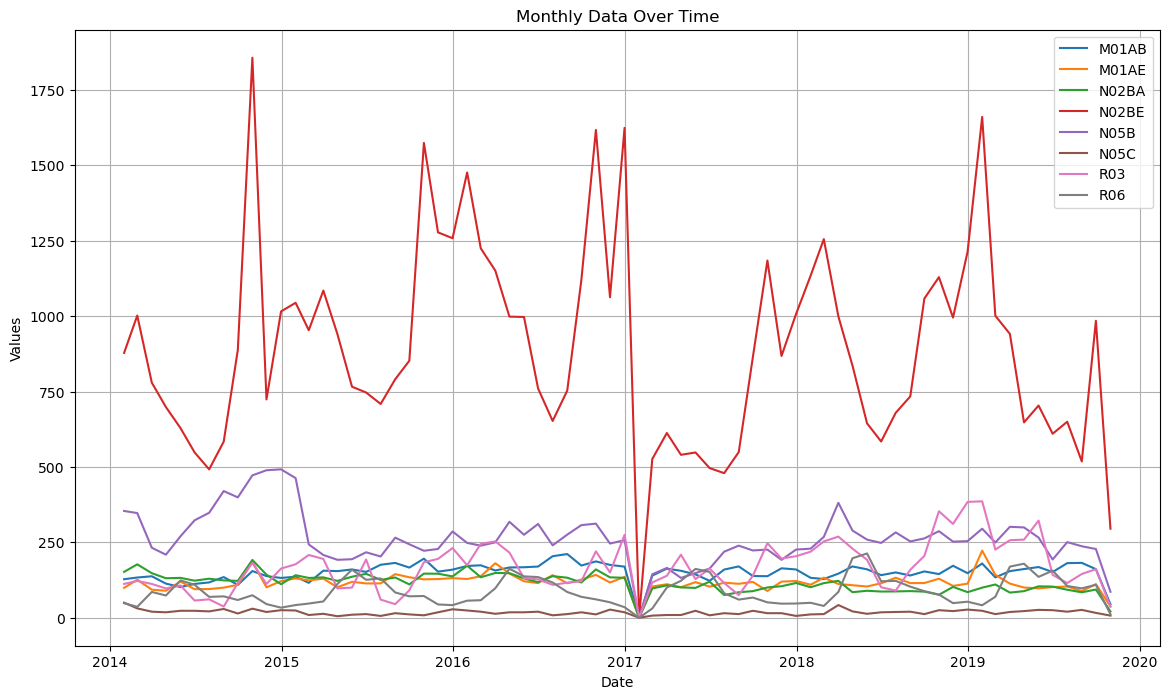

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/salesmonthly.csv"
monthly_df = pd.read_csv(file_path)

monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])

# Set 'datum' as index
monthly_df.set_index('datum', inplace=True)

plt.figure(figsize=(14, 8))
for column in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df[column], label=column)

plt.title("Monthly Data Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

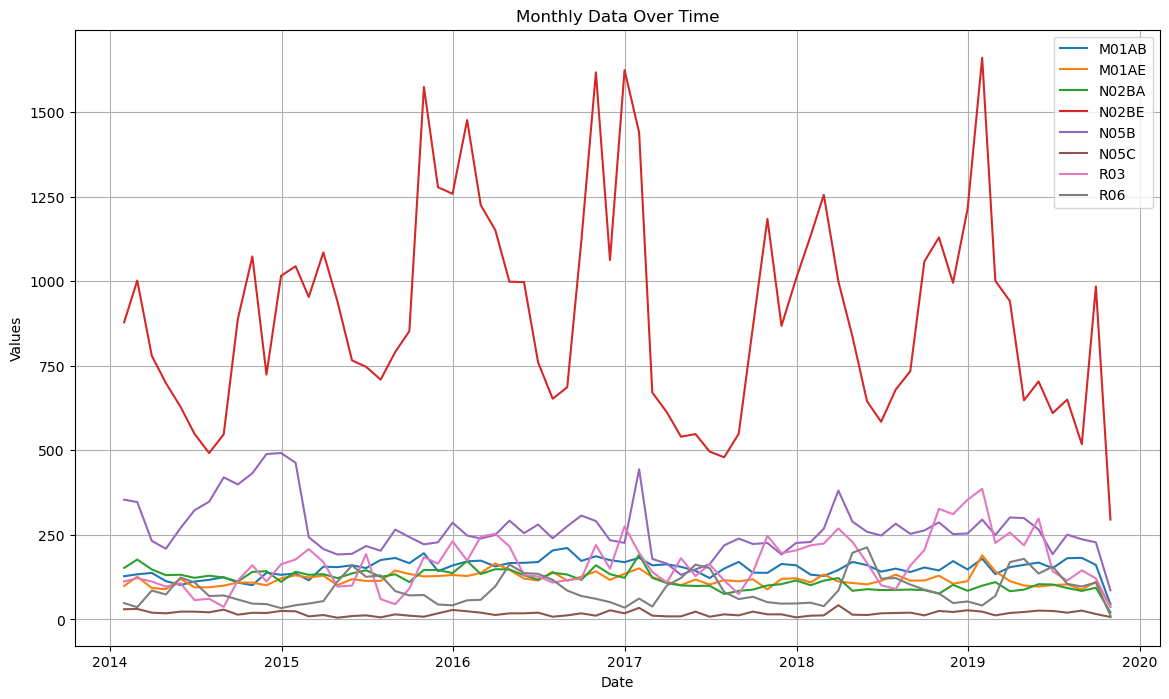

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected.csv"
monthly_df = pd.read_csv(file_path)

monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])

# Set 'datum' as index
monthly_df.set_index('datum', inplace=True)

plt.figure(figsize=(14, 8))
for column in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df[column], label=column)

plt.title("Monthly Data Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected_no_outliers.csv"
monthly_df = pd.read_csv(file_path)

monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])

# Set 'datum' as index
monthly_df.set_index('datum', inplace=True)

plt.figure(figsize=(14, 8))
for column in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df[column], label=column)

plt.title("Monthly Data Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

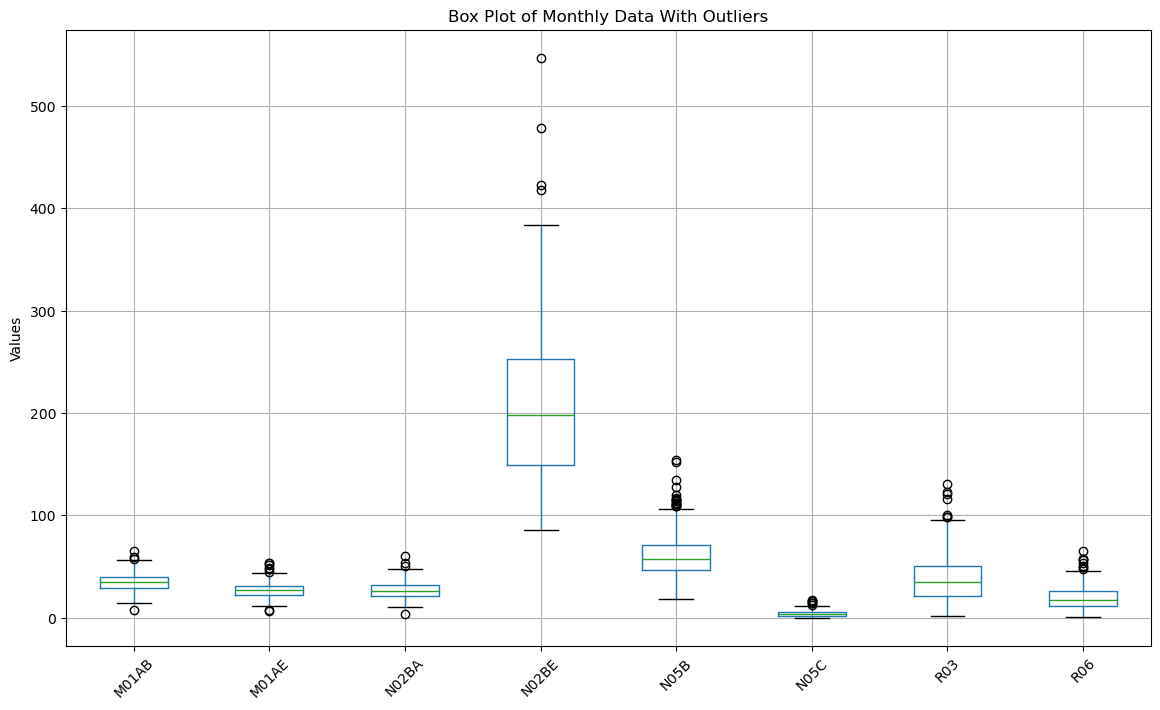

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/salesweekly.csv"
monthly_df = pd.read_csv(file_path)

monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])

monthly_df.set_index('datum', inplace=True)

plt.figure(figsize=(14, 8))
monthly_df.boxplot()
plt.title("Box Plot of Monthly Data With Outliers")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/salesweekly_corrected_no_outliers.csv"
monthly_df = pd.read_csv(file_path)

monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])

monthly_df.set_index('datum', inplace=True)

plt.figure(figsize=(14, 8))
monthly_df.boxplot()
plt.title("Box Plot of Monthly Data Without outliers")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [165]:
import pandas as pd

df = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected.csv")

numeric_df = df.select_dtypes(include=["number"])

stats = pd.DataFrame({
    "Range": numeric_df.max() - numeric_df.min(),
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Q1": numeric_df.quantile(0.25),
    "Q3": numeric_df.quantile(0.75),
    "IQR": numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
})

for col in stats.index:
    print(f"\nColumn: {col}")
    print(f"  Range : {stats.loc[col, 'Range']}")
    print(f"  Mean  : {stats.loc[col, 'Mean']}")
    print(f"  Median: {stats.loc[col, 'Median']}")
    print(f"  Q1    : {stats.loc[col, 'Q1']}")
    print(f"  Q3    : {stats.loc[col, 'Q3']}")
    print(f"  IQR   : {stats.loc[col, 'IQR']}")

print("\n=== Summary Table ===")
print(stats)


Column: M01AB
  Range : 166.76000000000016
  Mean  : 151.69588690477147
  Median: 155.06500000000005
  Q1    : 137.49
  Q3    : 169.5825
  IQR   : 32.0925

Column: M01AE
  Range : 152.346
  Mean  : 117.20883779761432
  Median: 114.97650000000004
  Q1    : 104.02750000000003
  Q3    : 128.35975
  IQR   : 24.33224999999996

Column: N02BA
  Range : 170.620833333
  Mean  : 116.8279857143
  Median: 117.225
  Q1    : 99.1125
  Q3    : 134.1125
  IQR   : 35.000000000000014

Column: N02BE
  Range : 1365.4620000000011
  Mean  : 902.4998005952858
  Median: 872.9645000000002
  Q1    : 656.9904583324999
  Q3    : 1070.52415625
  IQR   : 413.53369791750015

Column: N05B
  Range : 406.0
  Mean  : 266.36767857101427
  Median: 250.3
  Q1    : 226.0
  Q3    : 290.3749999975
  IQR   : 64.37499999750003

Column: N05C
  Range : 37.0
  Mean  : 17.856547619042857
  Median: 18.0
  Q1    : 12.0
  Q3    : 23.0
  IQR   : 11.0

Column: R03
  Range : 349.0
  Mean  : 165.8403273810286
  Median: 159.5
  Q1    : 11

In [183]:
import pandas as pd

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/salesweekly.csv"
df = pd.read_csv(file_path)

def column_stats_with_outliers(column):
    col_data = df[column].dropna()
    col_min = col_data.min()
    col_max = col_data.max()
    col_range = col_max - col_min
    col_mean = col_data.mean()
    col_median = col_data.median()
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    
    # Print results
    print(f"\nColumn: {column}")
    print(f"  Range   : {col_range}")
    print(f"  Mean    : {col_mean}")
    print(f"  Median  : {col_median}")
    print(f"  Q1      : {q1}")
    print(f"  Q3      : {q3}")
    print(f"  IQR     : {iqr}")
    print(f"  Lower Bound : {lower_bound}")
    print(f"  Upper Bound : {upper_bound}")
    print(f"  Outliers Detected ({len(outliers)} values):")
    print(outliers.values)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    column_stats_with_outliers(col)



Column: M01AB
  Range   : 57.66
  Mean    : 35.10244067327815
  Median  : 34.565
  Q1      : 29.387500000000003
  Q3      : 40.175
  IQR     : 10.787499999999994
  Lower Bound : 13.206250000000011
  Upper Bound : 56.35624999999999
  Outliers Detected (4 values):
[59.68 65.33 57.7   7.67]

Column: M01AE
  Range   : 47.333999999999996
  Mean    : 27.16761141006623
  Median  : 26.7895
  Q1      : 22.3875
  Q3      : 31.0465
  IQR     : 8.659000000000002
  Lower Bound : 9.398999999999996
  Upper Bound : 44.035000000000004
  Outliers Detected (8 values):
[ 7.71  44.87  48.752 52.069 53.243 53.571 47.251  6.237]

Column: N02BA
  Range   : 56.625
  Mean    : 27.060294701986756
  Median  : 26.5
  Q1      : 21.3
  Q3      : 32.475
  IQR     : 11.175
  Lower Bound : 4.537499999999998
  Upper Bound : 49.237500000000004
  Outliers Detected (4 values):
[53.3   50.5   60.125  3.5  ]

Column: N02BE
  Range   : 460.649
  Mean    : 208.6271612860927
  Median  : 198.3
  Q1      : 149.29999999999998
  Q

In [23]:
import pandas as pd

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected.csv"
df = pd.read_csv(file_path)

def handle_outliers_iteratively(df, max_iterations=10):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    iteration = 0
    prev_outliers = float("inf")   
    prev_df = df.copy()           
    
    while iteration < max_iterations:
        total_outliers = 0
        temp_df = df.copy()  
        print(f"\nIteration {iteration+1}")
        
        for col in numeric_cols:
            col_data = temp_df[col].dropna()
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            col_median = col_data.median()

            outlier_mask = (temp_df[col] < lower_bound) | (temp_df[col] > upper_bound)
            outlier_count = outlier_mask.sum()
            total_outliers += outlier_count

            if outlier_count > 0:
                print(f"  Column: {col} → Replacing {outlier_count} outliers with median={col_median:.2f}")
                temp_df.loc[outlier_mask, col] = col_median
        
        print(f"Total outliers this iteration: {total_outliers}")

        if total_outliers >= prev_outliers:
            print("Outliers did not decrease (or increased). Rolling back to previous iteration.")
            df = prev_df.copy()
            break

        if total_outliers == 0:
            print("No more outliers detected, stopping.")
            df = temp_df.copy()
            break

        prev_outliers = total_outliers
        prev_df = temp_df.copy()
        df = temp_df.copy()
        iteration += 1

    return df


df_cleaned = handle_outliers_iteratively(df)

output_path = "/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected_no_outliers.csv"
df_cleaned.to_csv(output_path, index=False)
print(f"\n Cleaned dataset saved as: {output_path}")



Iteration 1
  Column: M01AB → Replacing 1 outliers with median=155.07
  Column: M01AE → Replacing 3 outliers with median=114.98
  Column: N02BA → Replacing 2 outliers with median=117.22
  Column: N05B → Replacing 8 outliers with median=250.30
  Column: N05C → Replacing 1 outliers with median=18.00
  Column: R03 → Replacing 1 outliers with median=159.50
Total outliers this iteration: 16

Iteration 2
  Column: N05B → Replacing 6 outliers with median=250.30
Total outliers this iteration: 6

Iteration 3
  Column: N05B → Replacing 3 outliers with median=250.30
Total outliers this iteration: 3

Iteration 4
  Column: N05B → Replacing 3 outliers with median=250.30
Total outliers this iteration: 3
Outliers did not decrease (or increased). Rolling back to previous iteration.

 Cleaned dataset saved as: /Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected_no_outliers.csv


In [1]:
import pandas as pd

file_path = "/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected.csv"
df = pd.read_csv(file_path)

def handle_outliers_iteratively(df, max_iterations=10):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    iteration = 0
    prev_outliers = float("inf")   
    prev_df = df.copy()           
    
    while iteration < max_iterations:
        total_outliers = 0
        temp_df = df.copy()  
        print(f"\nIteration {iteration+1}")
        
        for col in numeric_cols:
            col_data = temp_df[col].dropna()
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Use mode instead of median
            try:
                col_mode = col_data.mode()[0]  
            except IndexError:
                col_mode = col_data.median()  # fallback if mode not available

            outlier_mask = (temp_df[col] < lower_bound) | (temp_df[col] > upper_bound)
            outlier_count = outlier_mask.sum()
            total_outliers += outlier_count

            if outlier_count > 0:
                print(f"  Column: {col} → Replacing {outlier_count} outliers with mode={col_mode}")
                temp_df.loc[outlier_mask, col] = col_mode
        
        print(f"Total outliers this iteration: {total_outliers}")

        if total_outliers >= prev_outliers:
            print("Outliers did not decrease (or increased). Rolling back to previous iteration.")
            df = prev_df.copy()
            break

        if total_outliers == 0:
            print("No more outliers detected, stopping.")
            df = temp_df.copy()
            break

        prev_outliers = total_outliers
        prev_df = temp_df.copy()
        df = temp_df.copy()
        iteration += 1

    return df


df_cleaned = handle_outliers_iteratively(df)

output_path = "/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected_no_outliers_mode.csv"
df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved as: {output_path}")



Iteration 1
  Column: M01AB → Replacing 1 outliers with mode=44.370000000000005
  Column: M01AE → Replacing 3 outliers with mode=37.3
  Column: N02BA → Replacing 2 outliers with mode=20.65
  Column: N05B → Replacing 8 outliers with mode=192.0
  Column: N05C → Replacing 1 outliers with mode=18.0
  Column: R03 → Replacing 1 outliers with mode=112.0
Total outliers this iteration: 16

Iteration 2
  Column: M01AB → Replacing 1 outliers with mode=44.370000000000005
  Column: M01AE → Replacing 3 outliers with mode=37.3
  Column: N02BA → Replacing 2 outliers with mode=20.65
  Column: N05B → Replacing 1 outliers with mode=192.0
Total outliers this iteration: 7

Iteration 3
  Column: M01AB → Replacing 1 outliers with mode=44.370000000000005
  Column: M01AE → Replacing 3 outliers with mode=37.3
  Column: N02BA → Replacing 2 outliers with mode=20.65
Total outliers this iteration: 6

Iteration 4
  Column: M01AB → Replacing 1 outliers with mode=44.370000000000005
  Column: M01AE → Replacing 3 outli

In [33]:
from statsmodels.tsa.stattools import adfuller

In [35]:
def add_diff_only_for_nonstationary(df, date_col, name):

    df = df.copy()

    df[date_col] = pd.to_datetime(df[date_col])

    df.set_index(date_col, inplace=True)

    new_df = df.copy()
    summary = []

    for col in df.columns:
        series = df[col].dropna()


        result = adfuller(series)
        p_value = result[1]

        if p_value > 0.05:
            new_df[f"{col}_diff"] = series.diff().round(2)
            summary.append((col, p_value, "Differenced"))
        else:
            summary.append((col, p_value, "Stationary"))

    new_df = new_df.round(2)

    out_file = f"{name}_stationary_with_diff.csv"
    new_df.to_csv(out_file)

    return new_df, summary, out_file

In [37]:
monthly = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/monthly_corrected_no_outliers.csv")
weekly = pd.read_csv("/Users/vamsikeshwaranm/Downloads/CTS/salesweekly_corrected_no_outliers.csv")

print(monthly.head())
print(weekly.head())

        datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  250.3  30.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  250.3  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7
       datum   M01AB  M01AE  N02BA   N02BE  N05B     N05C   R03   R06
0   1/5/2014  34.565  11.67   21.3  185.95  41.0  0.00000  32.0   7.0
1  1/12/2014  29.330  12.68   37.9  190.70  88.0  5.00000  21.0   7.2
2  1/19/2014  30.670  26.34   45.9  218.40  80.0  8.00000  29.0  12.0
3  1/26/2014  34.000  32.37   31.5  179.60  80.0  8.00000  23.0  10.0
4   2/2/2014  31.020  23.35   20.7  159.88  84.0  3.96875  29.0  12.0


In [39]:
monthly_new, summary_monthly, file_monthly = add_diff_only_for_nonstationary(monthly, "datum", "monthly")
weekly_new, summary_weekly, file_weekly = add_diff_only_for_nonstationary(weekly, "datum", "salesweekly")

In [41]:
print("Stationarity Test Results")

print("\n Monthly Data")
for col, p, status in summary_monthly:
    if status == "Stationary":
        print(f"{col}: p={p:.4f} (≤ 0.05) → Already Stationary, kept as original")
    else:
        print(f"{col}: p={p:.4f} (> 0.05) → Non-stationary, differenced column added as '{col}_diff'")

print("\n Weekly Data")
for col, p, status in summary_weekly:
    if status == "Stationary":
        print(f"{col}: p={p:.4f} (≤ 0.05) → Already Stationary, kept as original")
    else:
        print(f"{col}: p={p:.4f} (> 0.05) → Non-stationary, differenced column added as '{col}_diff'")

Stationarity Test Results

 Monthly Data
M01AB: p=0.3991 (> 0.05) → Non-stationary, differenced column added as 'M01AB_diff'
M01AE: p=0.0000 (≤ 0.05) → Already Stationary, kept as original
N02BA: p=0.2605 (> 0.05) → Non-stationary, differenced column added as 'N02BA_diff'
N02BE: p=0.0002 (≤ 0.05) → Already Stationary, kept as original
N05B: p=0.0000 (≤ 0.05) → Already Stationary, kept as original
N05C: p=0.0000 (≤ 0.05) → Already Stationary, kept as original
R03: p=0.0016 (≤ 0.05) → Already Stationary, kept as original
R06: p=0.4715 (> 0.05) → Non-stationary, differenced column added as 'R06_diff'

 Weekly Data
M01AB: p=0.0005 (≤ 0.05) → Already Stationary, kept as original
M01AE: p=0.0000 (≤ 0.05) → Already Stationary, kept as original
N02BA: p=0.4180 (> 0.05) → Non-stationary, differenced column added as 'N02BA_diff'
N02BE: p=0.0025 (≤ 0.05) → Already Stationary, kept as original
N05B: p=0.0005 (≤ 0.05) → Already Stationary, kept as original
N05C: p=0.0218 (≤ 0.05) → Already Stationa

In [43]:
print("\n Files saved as:")
print(file_monthly)
print(file_weekly)


 Files saved as:
monthly_stationary_with_diff.csv
salesweekly_stationary_with_diff.csv


In [45]:
monthly_with_diff = pd.read_csv("monthly_stationary_with_diff.csv")
weekly_with_diff = pd.read_csv("salesweekly_stationary_with_diff.csv")

display(monthly_with_diff.head())
display(weekly_with_diff.head())

datum   M01AB   M01AE   N02BA    N02BE   N05B  N05C    R03    R06  \
0  2014-01-31  127.69   99.09  152.10   878.03  250.3  30.0  112.0   48.2   
1  2014-02-28  133.32  126.05  177.00  1001.90  250.3  31.0  122.0   36.2   
2  2014-03-31  137.44   92.95  147.66   779.28  232.0  20.0  112.0   85.4   
3  2014-04-30  113.10   89.48  130.90   698.50  209.0  18.0   97.0   73.7   
4  2014-05-31  101.79  119.93  132.10   628.78  270.0  23.0  107.0  123.7   

   M01AB_diff  N02BA_diff  R06_diff  
0         NaN         NaN       NaN  
1        5.63       24.90     -12.0  
2        4.12      -29.34      49.2  
3      -24.34      -16.76     -11.7  
4      -11.31        1.20      50.0

datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06  N02BA_diff
0  2014-01-05  34.56  11.67   21.3  185.95  41.0  0.00  32.0   7.0         NaN
1  2014-01-12  29.33  12.68   37.9  190.70  88.0  5.00  21.0   7.2        16.6
2  2014-01-19  30.67  26.34   45.9  218.40  80.0  8.00  29.0  12.0         8.0
3  2014-01-26  34.00  32.37   31.5  179.60  80.0  8.00  23.0  10.0       -14.4
4  2014-02-02  31.02  23.35   20.7  159.88  84.0  3.97  29.0  12.0       -10.8

# EDA Weekly

In [54]:
sns.set(style='whitegrid')

In [55]:
df = pd.read_csv('salesweekly_updated.csv', parse_dates=['datum'])
df.set_index('datum', inplace=True)

In [56]:
drug_categories = df.columns.tolist()


--- EDA for M01AB ---


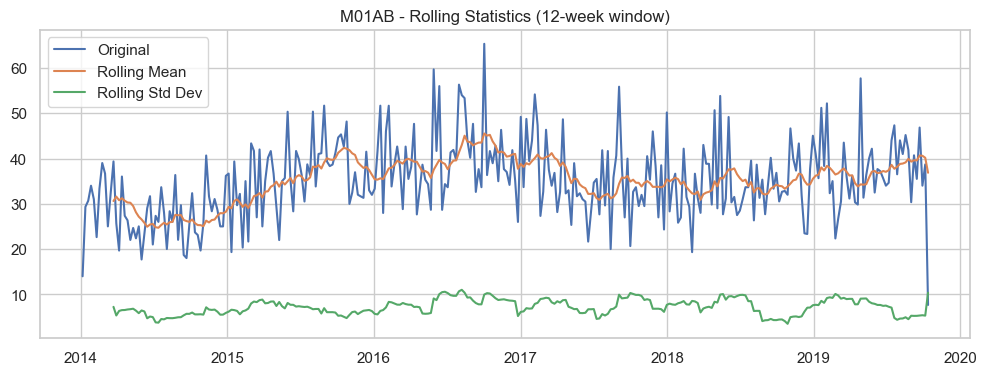


--- EDA for M01AE ---


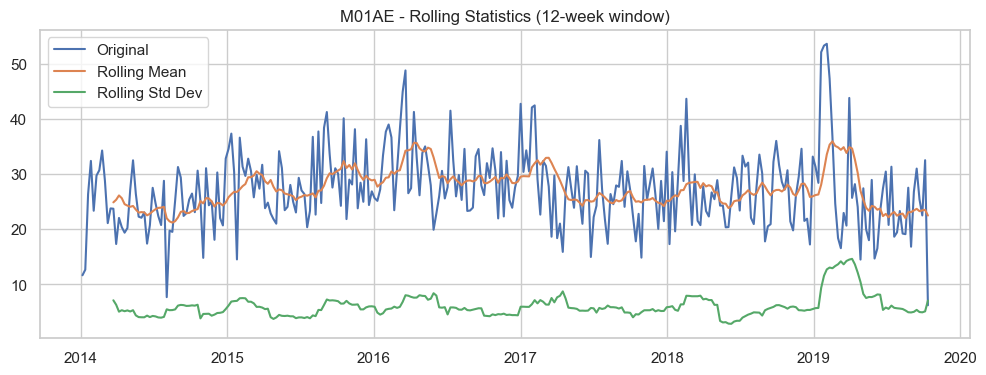


--- EDA for N02BA ---


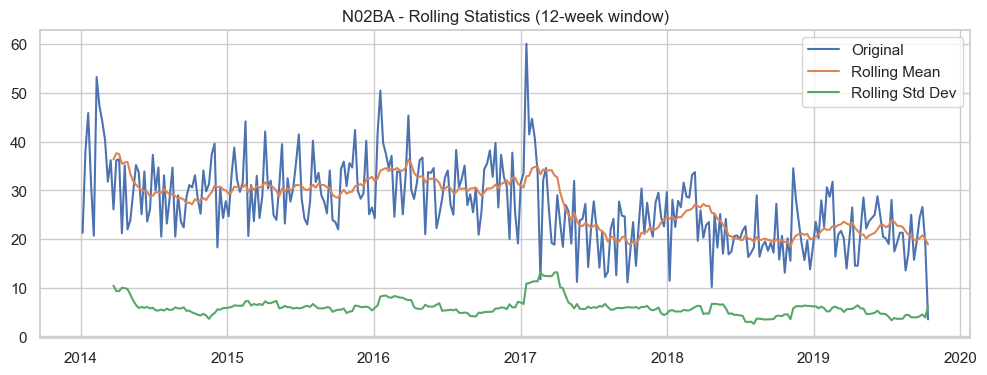


--- EDA for N02BE ---


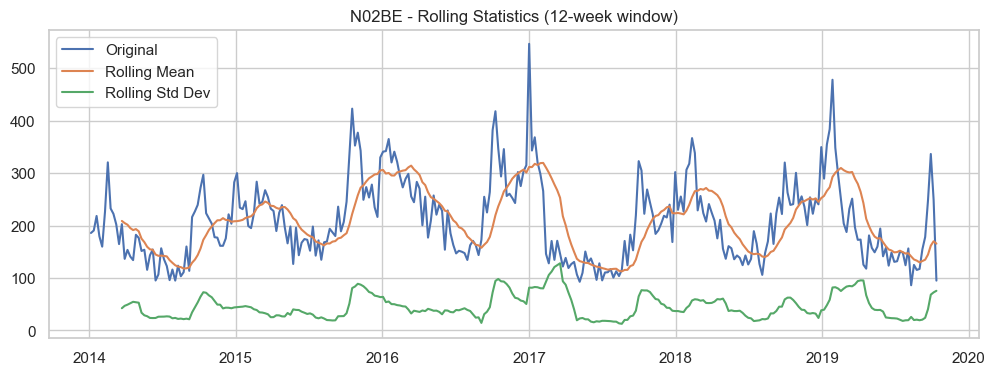


--- EDA for N05B ---



--- EDA for N05C ---


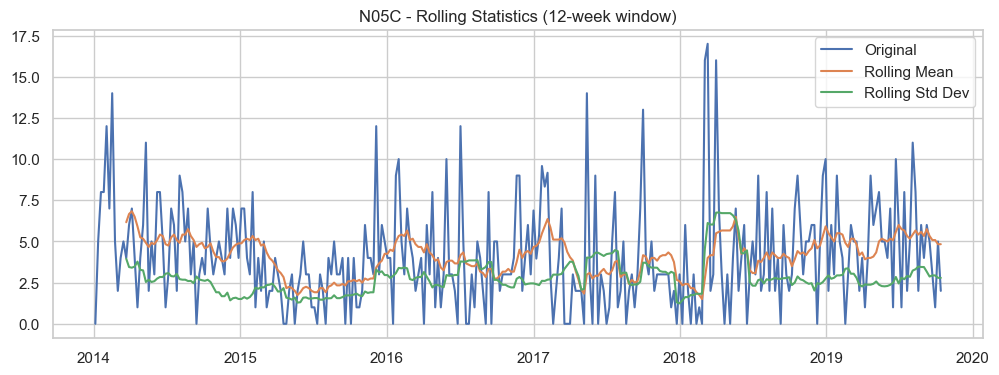


--- EDA for R03 ---


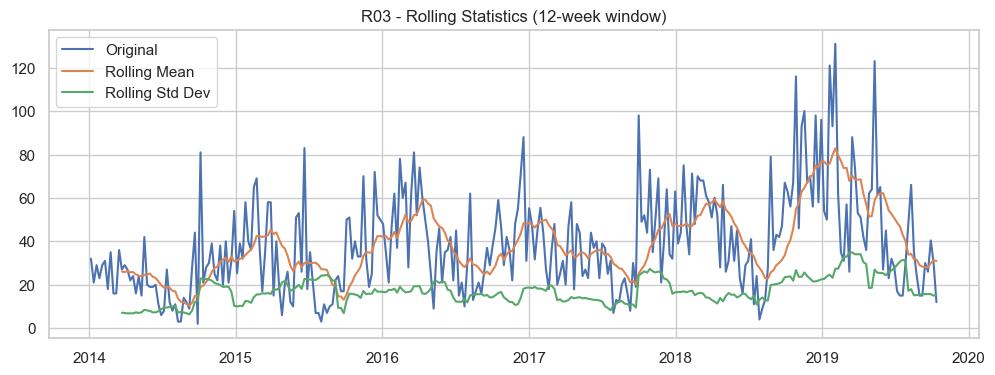


--- EDA for R06 ---


In [57]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    rolling_mean = df[drug].rolling(window=12).mean()
    rolling_std = df[drug].rolling(window=12).std()

    plt.figure(figsize=(12, 4))
    plt.plot(df[drug], label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std Dev')
    plt.title(f'{drug} - Rolling Statistics (12-week window)')
    plt.legend()
    plt.show()


--- EDA for M01AB ---



--- EDA for M01AE ---



--- EDA for N02BA ---


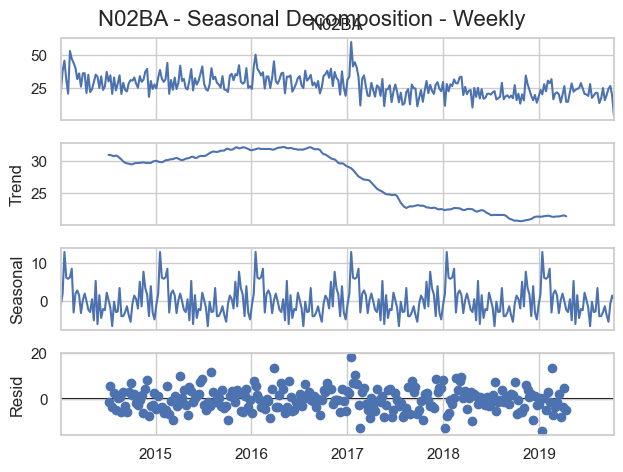


--- EDA for N02BE ---



--- EDA for N05B ---


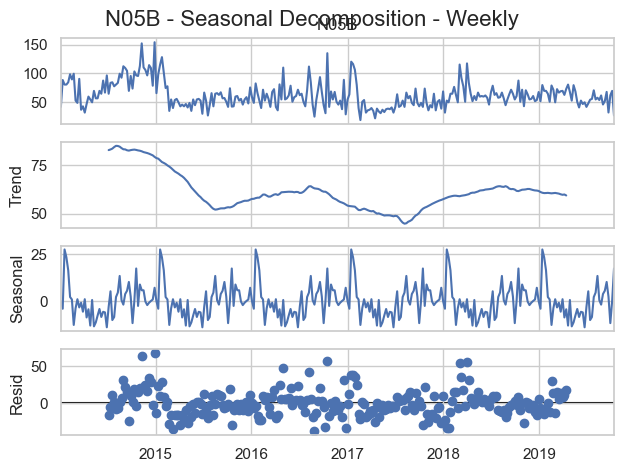


--- EDA for N05C ---


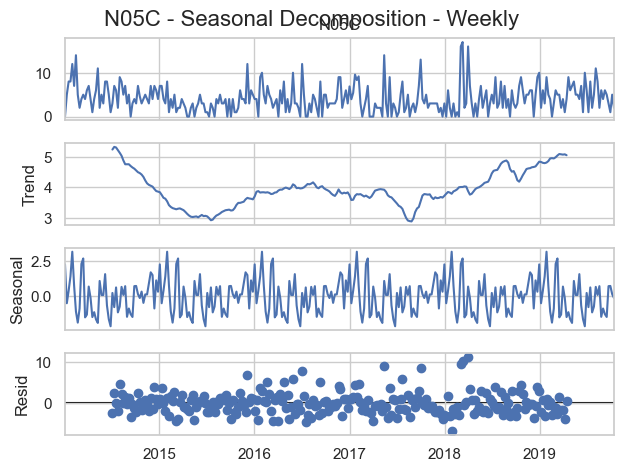


--- EDA for R03 ---


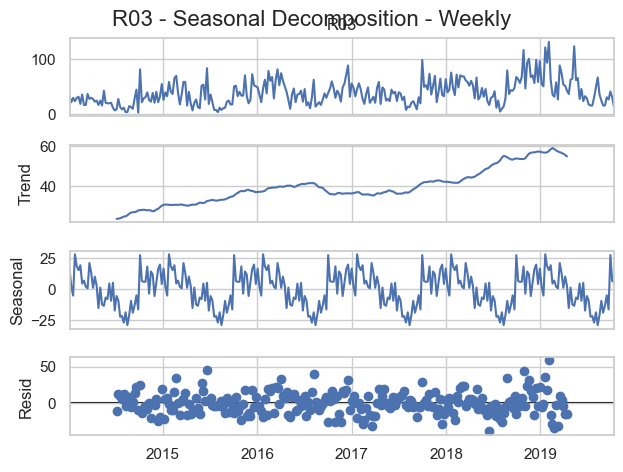


--- EDA for R06 ---


In [58]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    decomposition = seasonal_decompose(df[drug], model='additive', period=52)
    decomposition.plot()
    plt.suptitle(f'{drug} - Seasonal Decomposition - Weekly', fontsize=16)
    plt.show()

In [59]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    adf_result = adfuller(df[drug].dropna())
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"P-Value: {adf_result[1]:.4f}")
    print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")


--- EDA for M01AB ---
ADF Statistic: -3.6287
P-Value: 0.0052
Stationary

--- EDA for M01AE ---
ADF Statistic: -8.7392
P-Value: 0.0000
Stationary

--- EDA for N02BA ---
ADF Statistic: -1.7213
P-Value: 0.4201
Non-Stationary

--- EDA for N02BE ---
ADF Statistic: -4.3706
P-Value: 0.0003
Stationary

--- EDA for N05B ---
ADF Statistic: -3.5988
P-Value: 0.0058
Stationary

--- EDA for N05C ---
ADF Statistic: -15.0007
P-Value: 0.0000
Stationary

--- EDA for R03 ---
ADF Statistic: -3.4176
P-Value: 0.0104
Stationary

--- EDA for R06 ---
ADF Statistic: -5.0280
P-Value: 0.0000
Stationary



--- EDA for M01AB ---


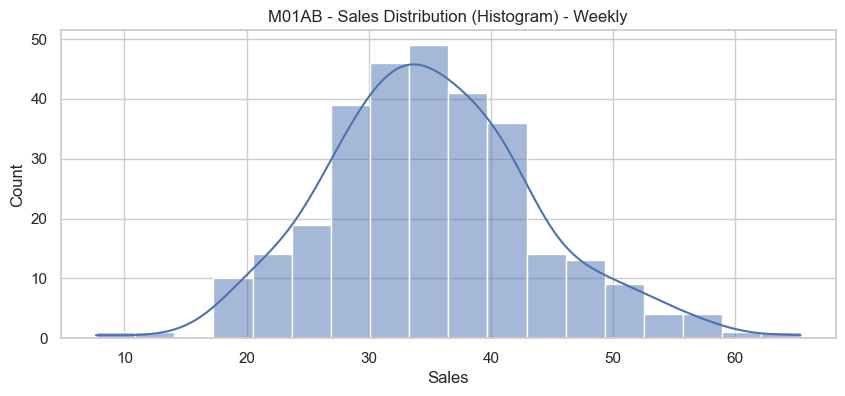


--- EDA for M01AE ---


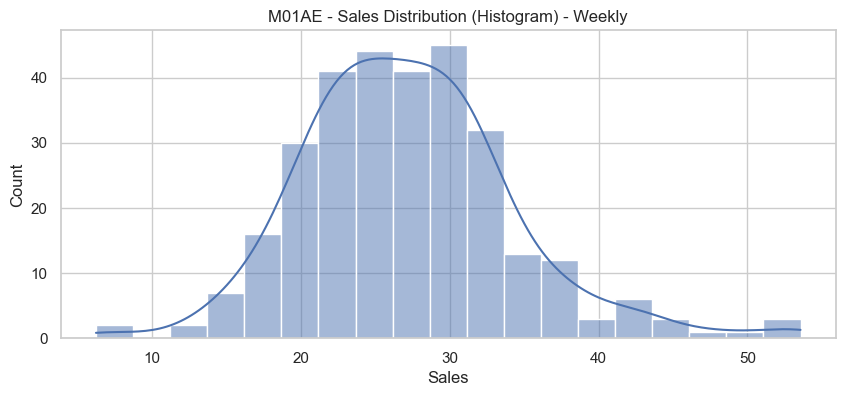


--- EDA for N02BA ---


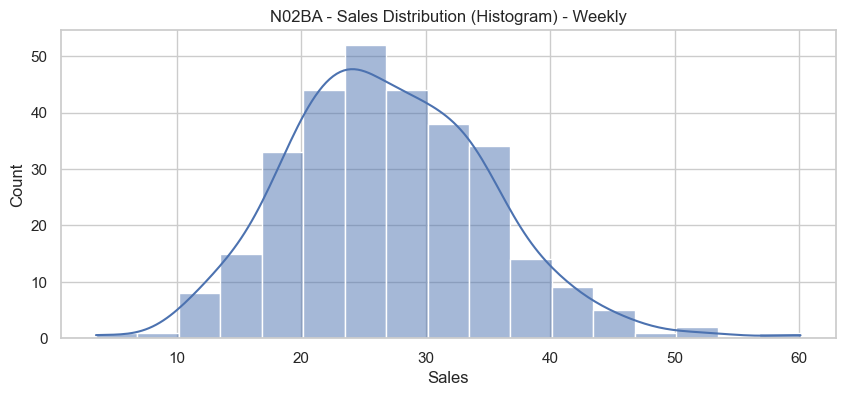


--- EDA for N02BE ---


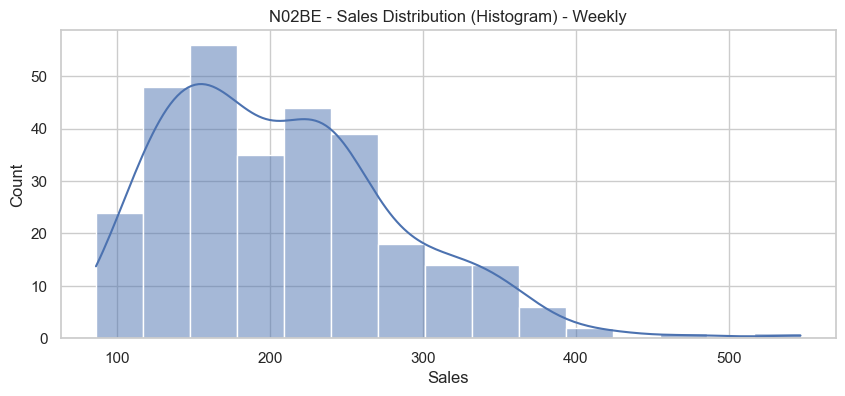


--- EDA for N05B ---



--- EDA for N05C ---



--- EDA for R03 ---



--- EDA for R06 ---


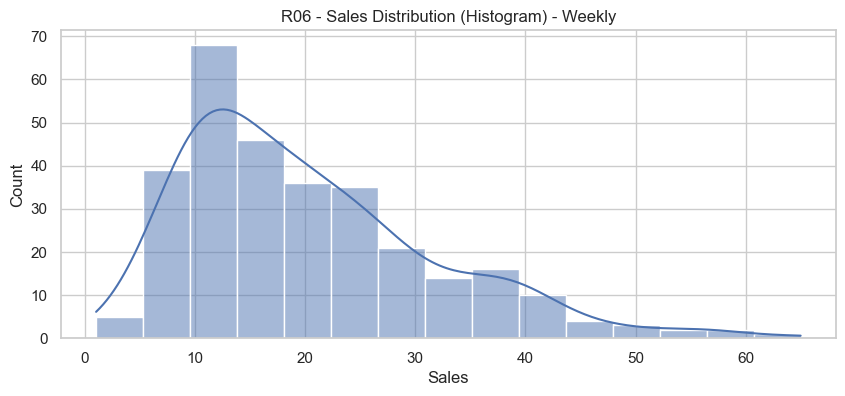

In [60]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    plt.figure(figsize=(10, 4))
    sns.histplot(df[drug], kde=True)
    plt.title(f'{drug} - Sales Distribution (Histogram) - Weekly')
    plt.xlabel('Sales')
    plt.show()



--- EDA for M01AB ---



--- EDA for M01AE ---


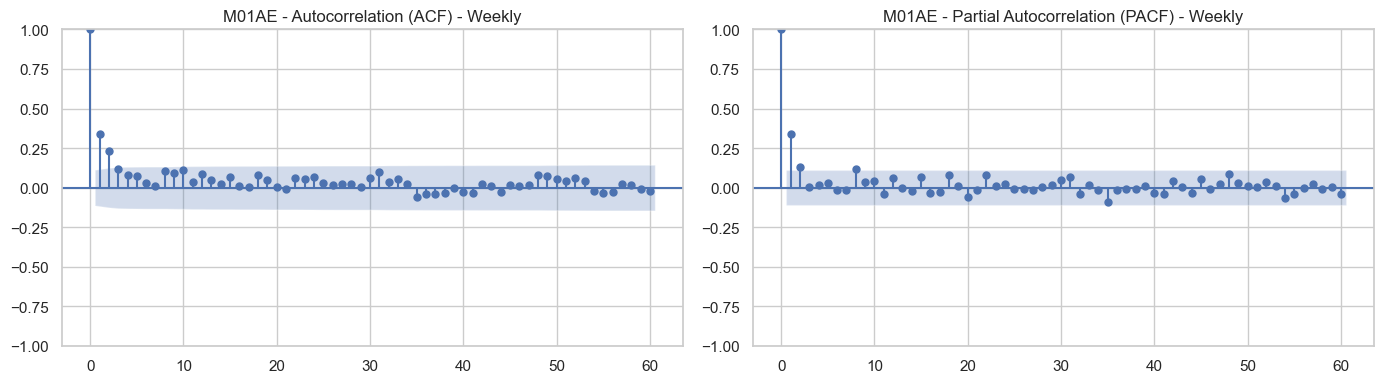


--- EDA for N02BA ---


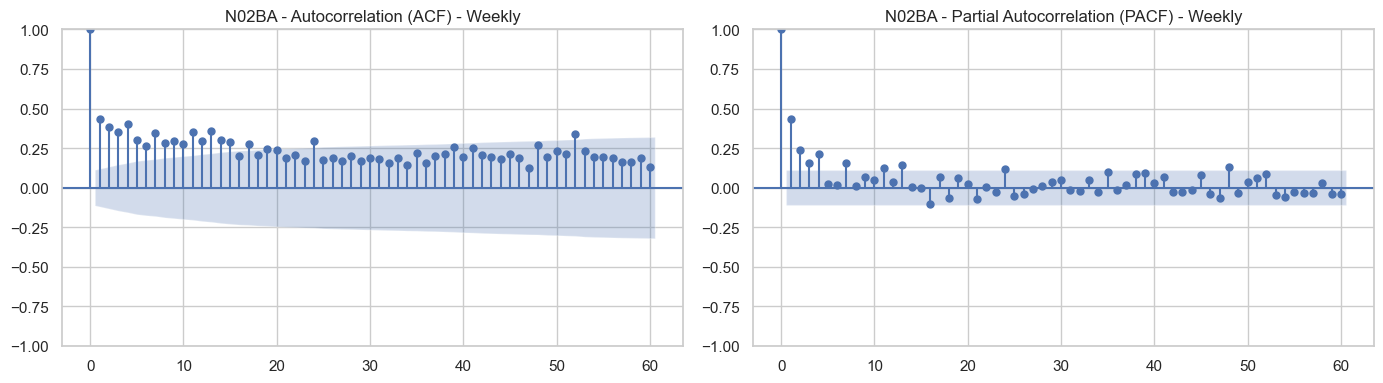


--- EDA for N02BE ---



--- EDA for N05B ---



--- EDA for N05C ---


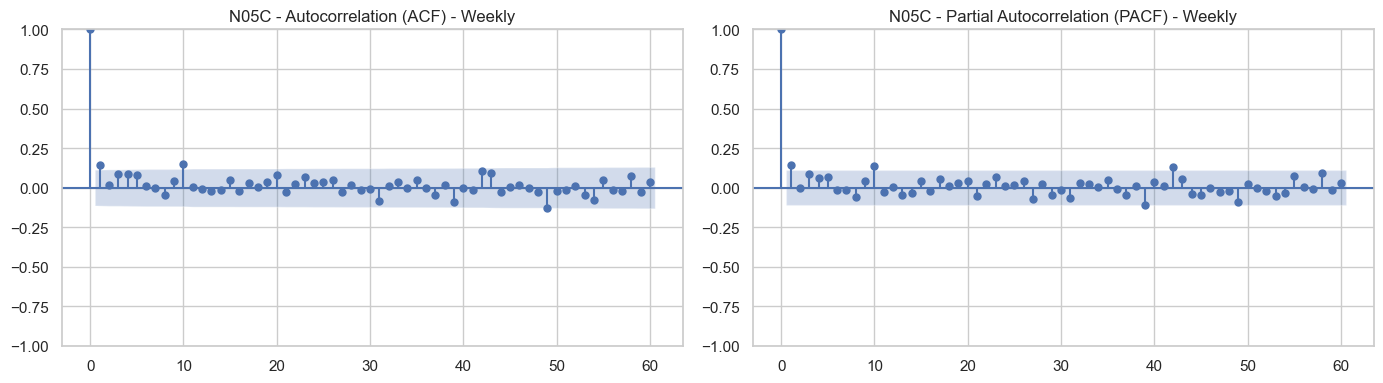


--- EDA for R03 ---


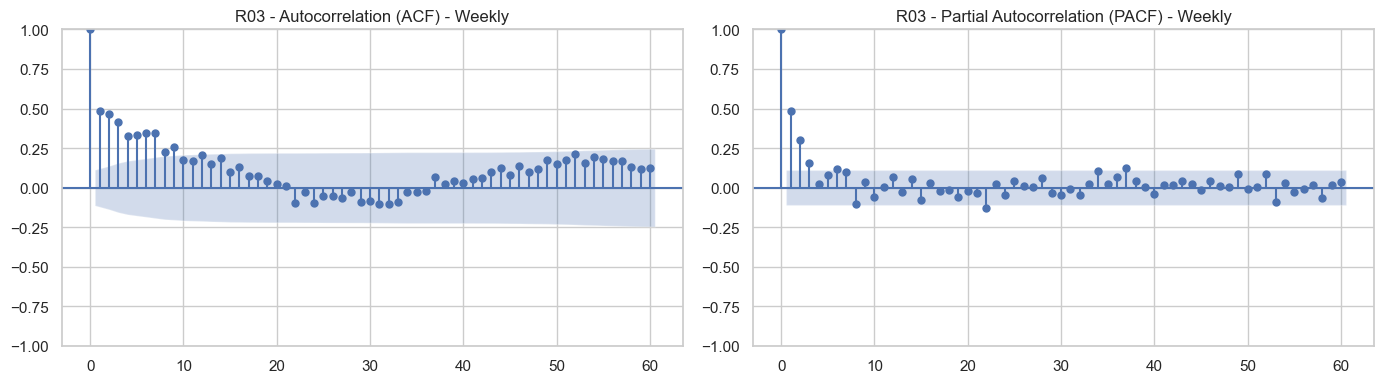


--- EDA for R06 ---


In [61]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(df[drug].dropna(), ax=ax[0], lags=60)
    plot_pacf(df[drug].dropna(), ax=ax[1], lags=60, method='ywm')
    ax[0].set_title(f'{drug} - Autocorrelation (ACF) - Weekly')
    ax[1].set_title(f'{drug} - Partial Autocorrelation (PACF) - Weekly')
    plt.tight_layout()
    plt.show()


In [62]:
series = df['N02BA']

# First-order differencing
first_diff = series.diff().dropna()

# Seasonal differencing (assuming weekly data with annual seasonality)
seasonal_diff = first_diff.diff(52).dropna()

# ADF test on transformed series
adf_result = adfuller(seasonal_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")


ADF Statistic: -6.179963044914169
p-value: 6.491164990831034e-08
Critical Values:
   1%: -3.4586
   5%: -2.8740
   10%: -2.5734
Stationary


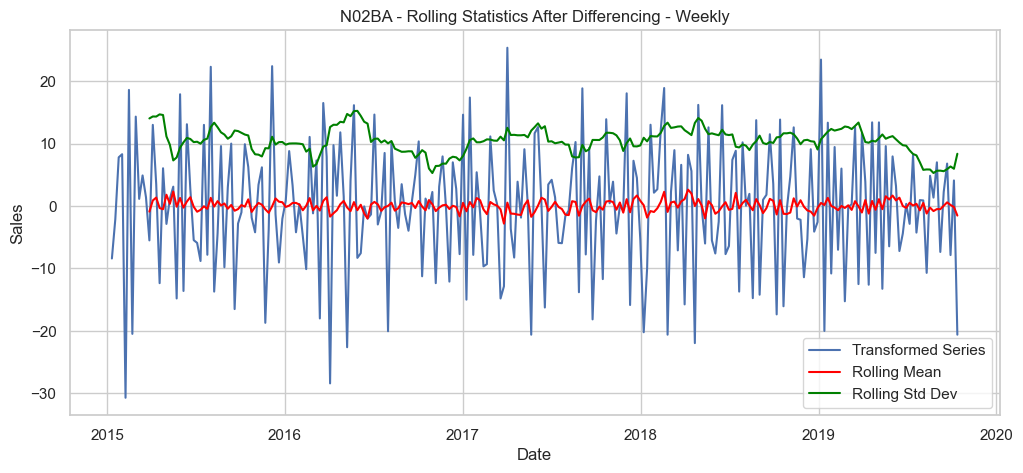

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(seasonal_diff, label='Transformed Series')
plt.title('N02BA - Stationarity Transformed Series - Weekly')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

# Rolling statistics
rolling_mean = seasonal_diff.rolling(window=12).mean()
rolling_std = seasonal_diff.rolling(window=12).std()

plt.figure(figsize=(12, 5))
plt.plot(seasonal_diff, label='Transformed Series')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('N02BA - Rolling Statistics After Differencing - Weekly')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# EDA Monthly

In [64]:
df = pd.read_csv('monthly_corrected.csv', parse_dates=['datum'])
df.set_index('datum', inplace=True)

In [65]:
drug_categories = df.columns.tolist()


--- EDA for M01AB ---



--- EDA for M01AE ---


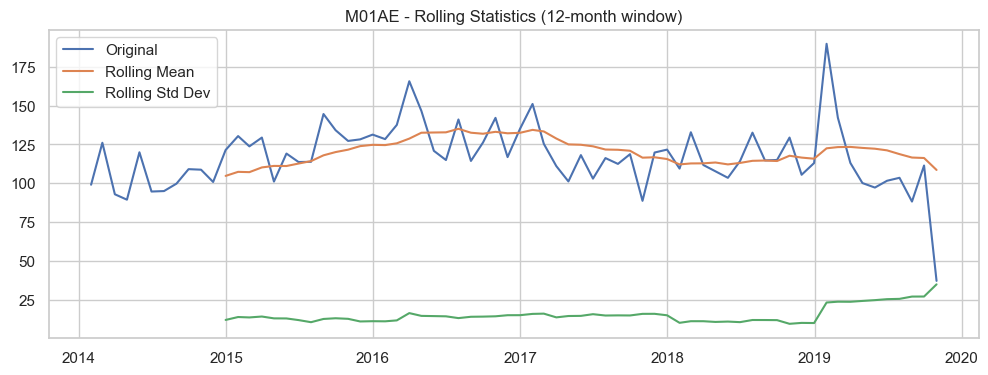


--- EDA for N02BA ---


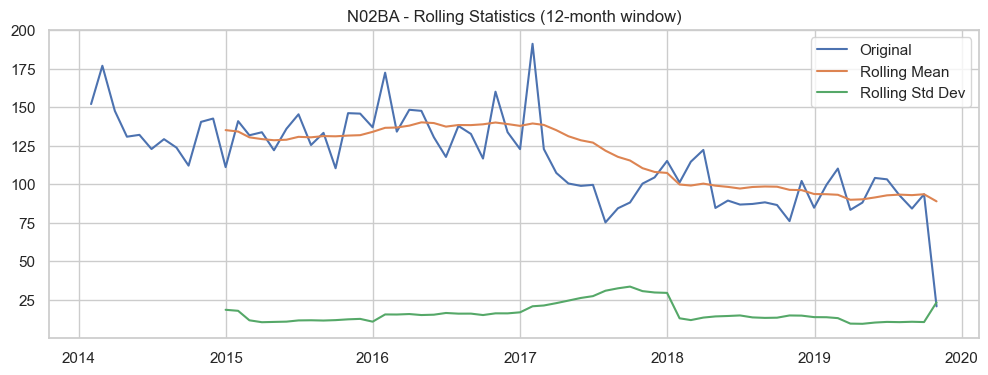


--- EDA for N02BE ---



--- EDA for N05B ---


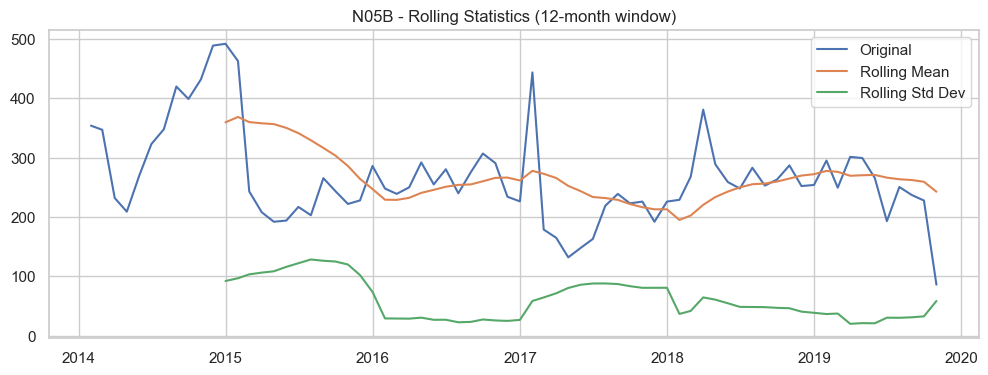


--- EDA for N05C ---


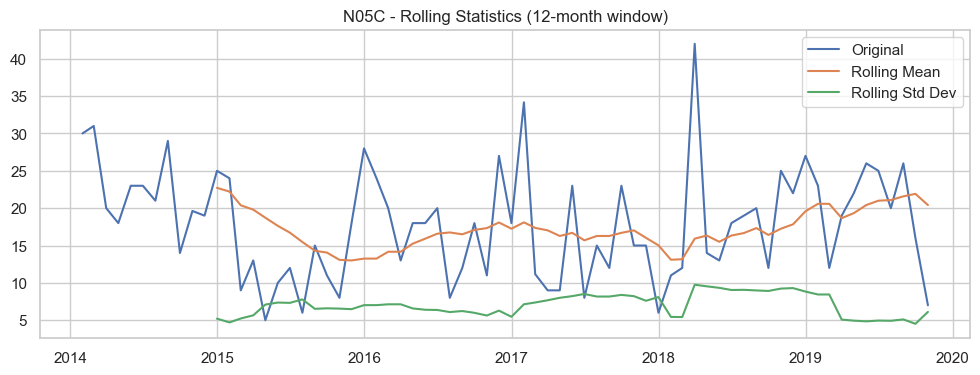


--- EDA for R03 ---


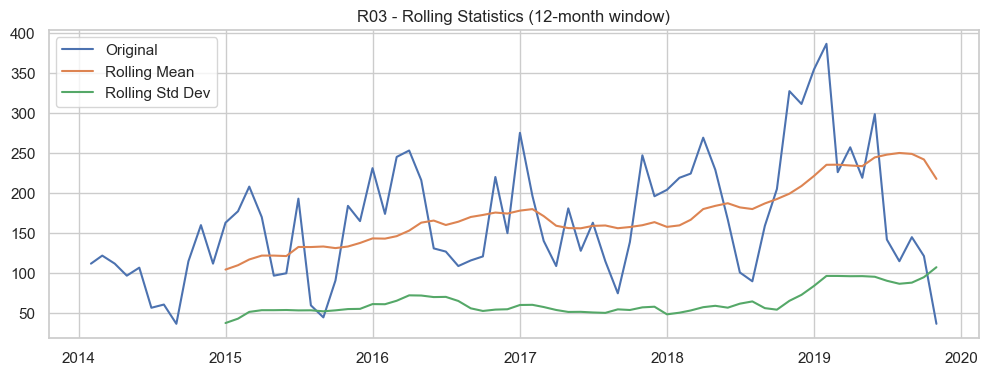


--- EDA for R06 ---


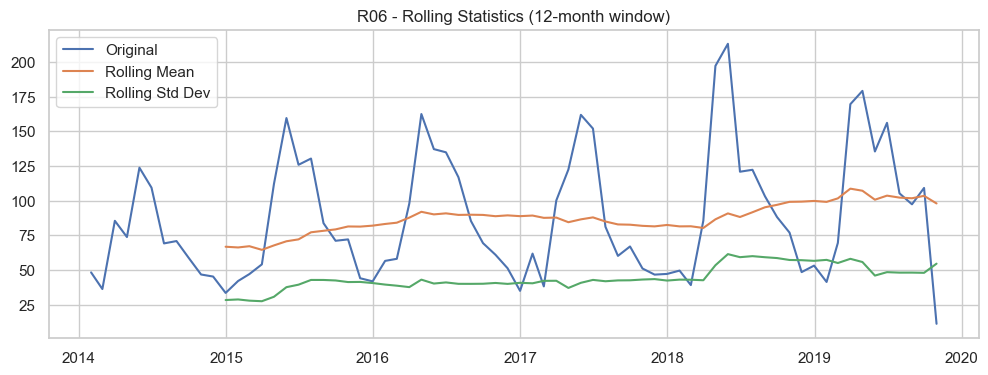

In [66]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    rolling_mean = df[drug].rolling(window=12).mean()
    rolling_std = df[drug].rolling(window=12).std()

    plt.figure(figsize=(12, 4))
    plt.plot(df[drug], label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std Dev')
    plt.title(f'{drug} - Rolling Statistics (12-month window)')
    plt.legend()
    plt.show()


--- EDA for M01AB ---


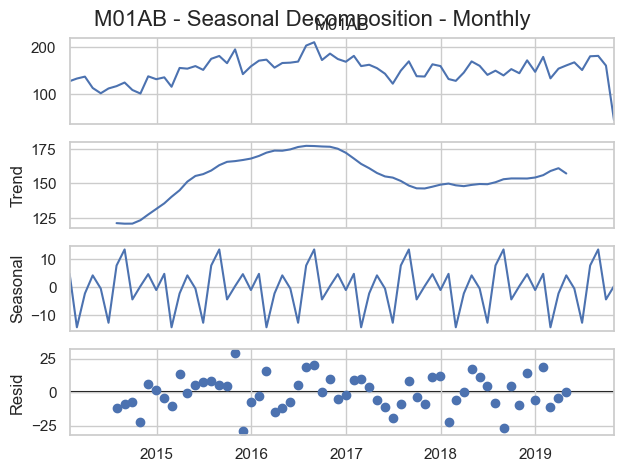


--- EDA for M01AE ---


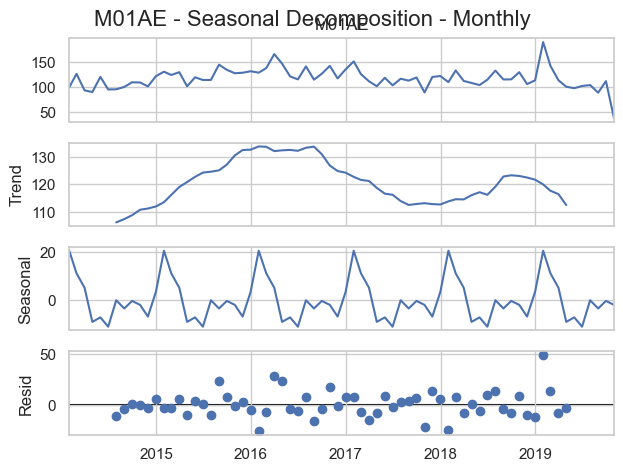


--- EDA for N02BA ---



--- EDA for N02BE ---



--- EDA for N05B ---


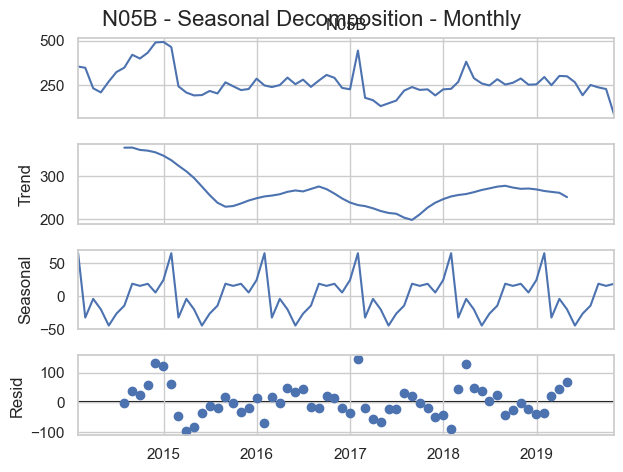


--- EDA for N05C ---


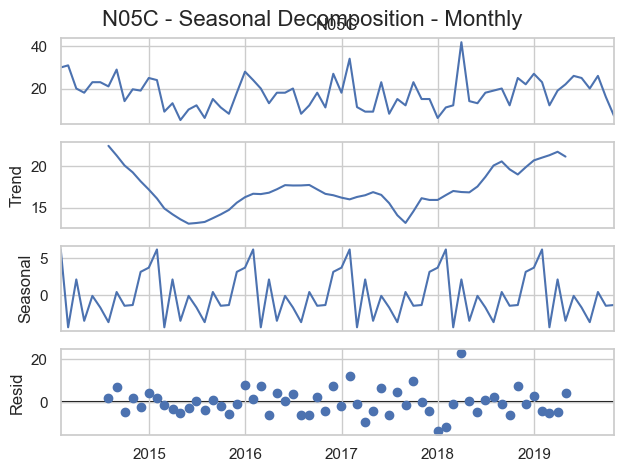


--- EDA for R03 ---



--- EDA for R06 ---


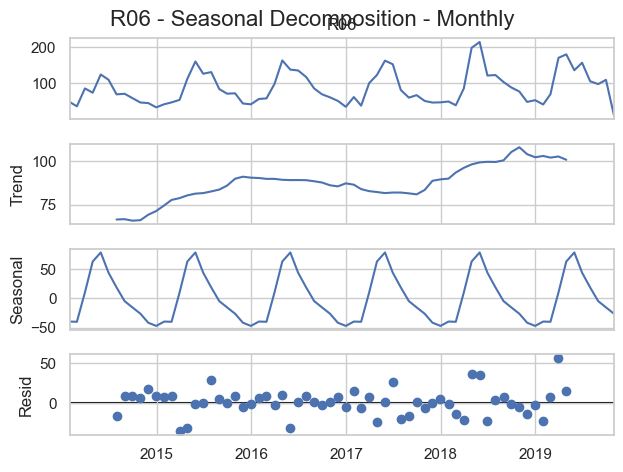

In [67]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    decomposition = seasonal_decompose(df[drug], model='additive', period=12)
    decomposition.plot()
    plt.suptitle(f'{drug} - Seasonal Decomposition - Monthly', fontsize=16)
    plt.show()

In [68]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    adf_result = adfuller(df[drug].dropna())
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"P-Value: {adf_result[1]:.4f}")
    print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")


--- EDA for M01AB ---
ADF Statistic: -3.2886
P-Value: 0.0154
Stationary

--- EDA for M01AE ---
ADF Statistic: -4.6493
P-Value: 0.0001
Stationary

--- EDA for N02BA ---
ADF Statistic: -1.0658
P-Value: 0.7285
Non-Stationary

--- EDA for N02BE ---
ADF Statistic: -4.4663
P-Value: 0.0002
Stationary

--- EDA for N05B ---
ADF Statistic: -3.4550
P-Value: 0.0092
Stationary

--- EDA for N05C ---
ADF Statistic: -6.7063
P-Value: 0.0000
Stationary

--- EDA for R03 ---
ADF Statistic: -3.5002
P-Value: 0.0080
Stationary

--- EDA for R06 ---
ADF Statistic: -1.6224
P-Value: 0.4715
Non-Stationary



--- EDA for M01AB ---



--- EDA for M01AE ---


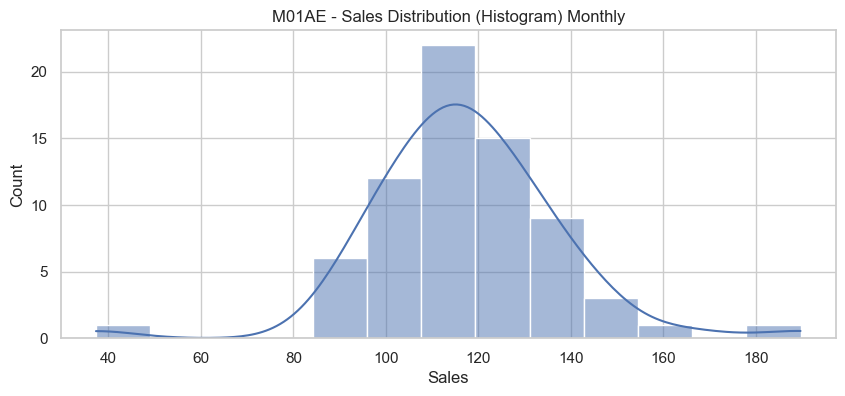


--- EDA for N02BA ---


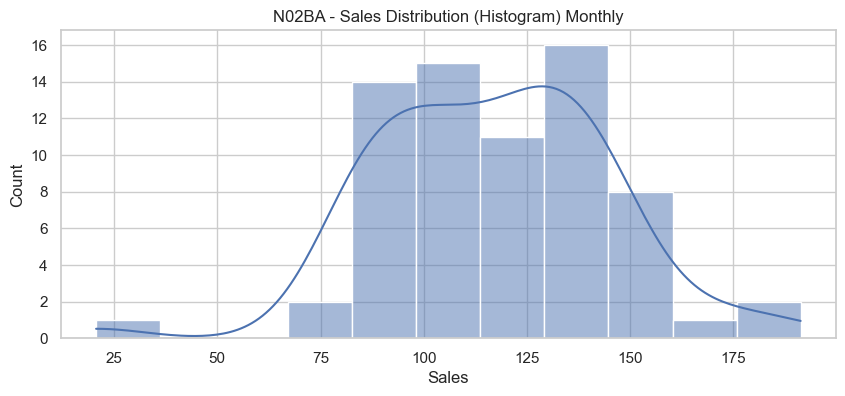


--- EDA for N02BE ---


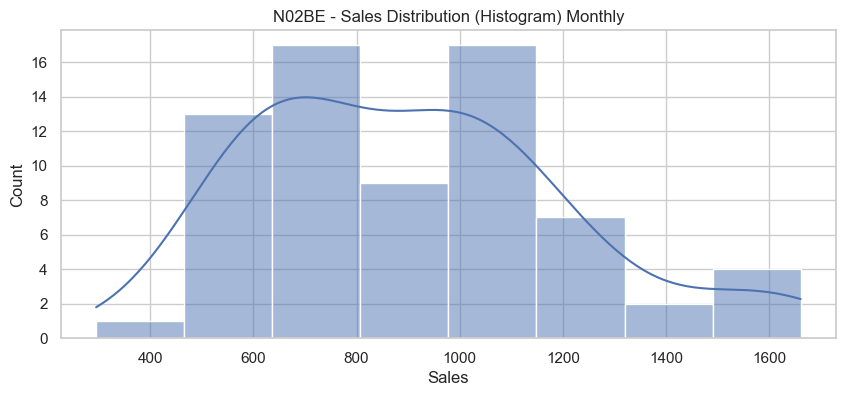


--- EDA for N05B ---



--- EDA for N05C ---


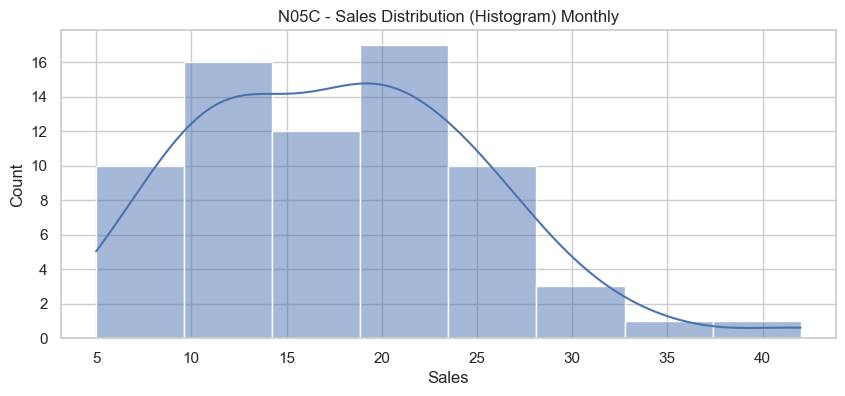


--- EDA for R03 ---



--- EDA for R06 ---


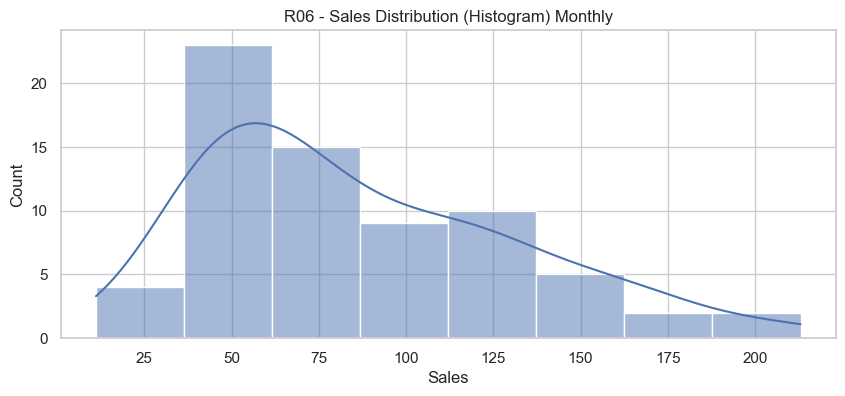

In [69]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    plt.figure(figsize=(10, 4))
    sns.histplot(df[drug], kde=True)
    plt.title(f'{drug} - Sales Distribution (Histogram) Monthly')
    plt.xlabel('Sales')
    plt.show()



--- EDA for M01AB ---



--- EDA for M01AE ---


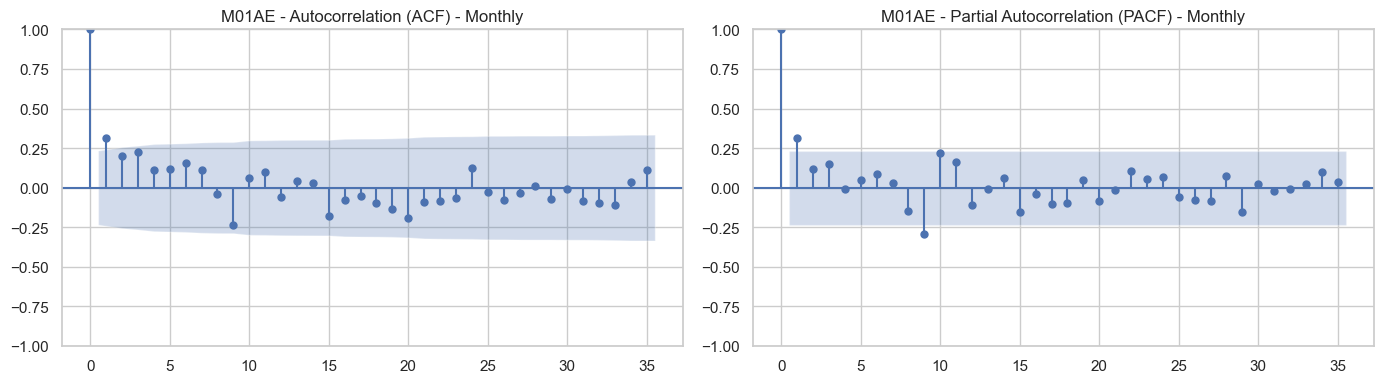


--- EDA for N02BA ---



--- EDA for N02BE ---


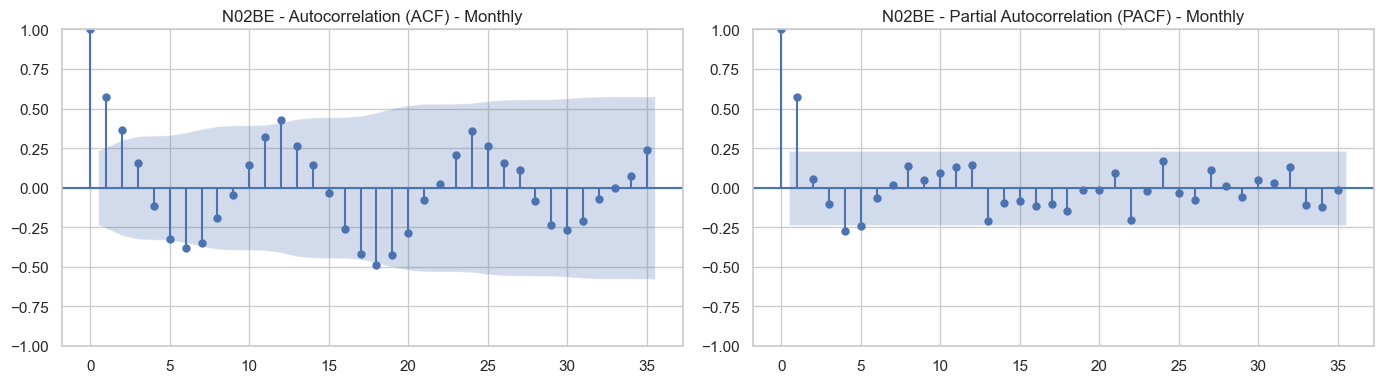


--- EDA for N05B ---



--- EDA for N05C ---


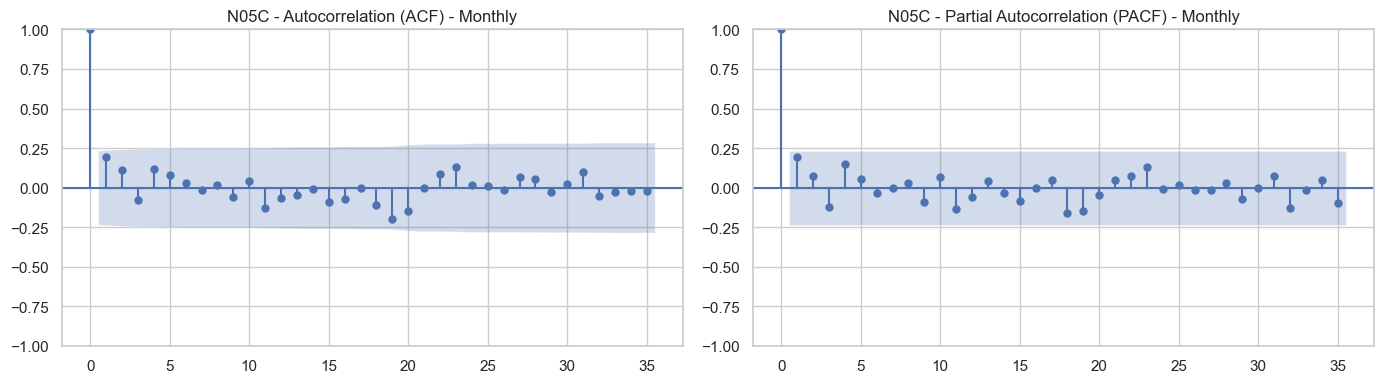


--- EDA for R03 ---


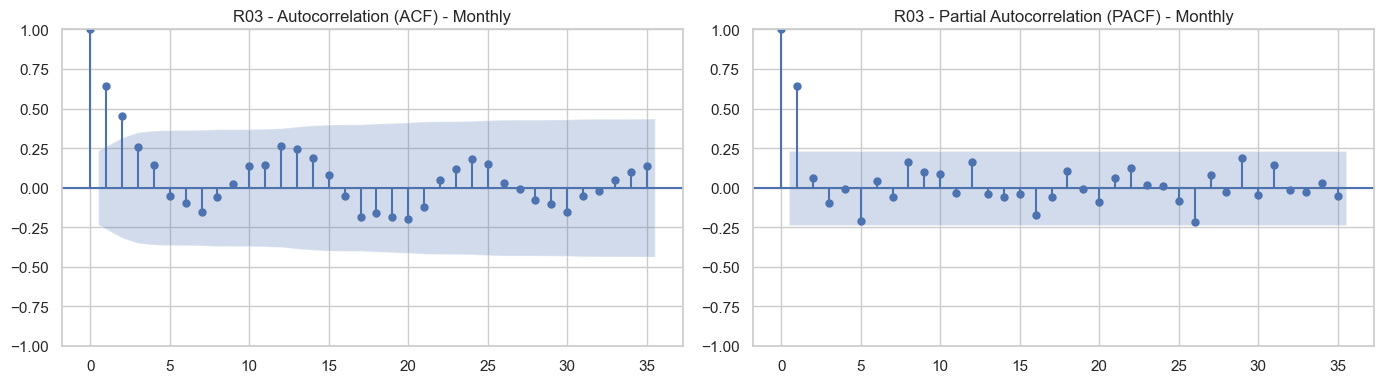


--- EDA for R06 ---


In [70]:
for drug in drug_categories:
    print(f"\n--- EDA for {drug} ---")
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(df[drug].dropna(), ax=ax[0], lags=35)
    plot_pacf(df[drug].dropna(), ax=ax[1], lags=35, method='ywm')
    ax[0].set_title(f'{drug} - Autocorrelation (ACF) - Monthly')
    ax[1].set_title(f'{drug} - Partial Autocorrelation (PACF) - Monthly')
    plt.tight_layout()
    plt.show()


In [74]:
series = df['N02BA']

# First-order differencing
first_diff = series.diff().dropna()

# Seasonal differencing (assuming monthly data with annual seasonality)
seasonal_diff = first_diff.diff(12).dropna()

# ADF test on transformed series
adf_result = adfuller(seasonal_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")


ADF Statistic: -9.901514531402498
p-value: 3.3481582949795955e-17
Critical Values:
   1%: -3.5553
   5%: -2.9157
   10%: -2.5957
Stationary


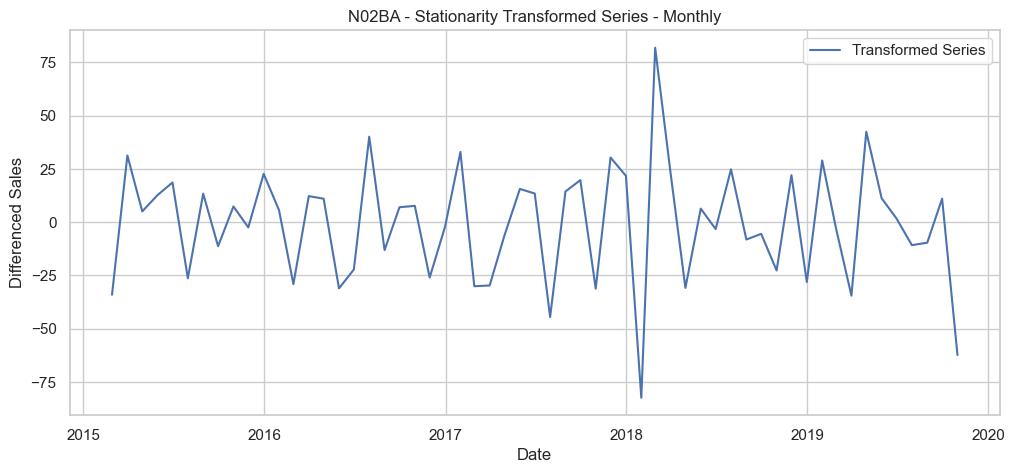

In [75]:
plt.figure(figsize=(12, 5))
plt.plot(seasonal_diff, label='Transformed Series')
plt.title('N02BA - Stationarity Transformed Series - Monthly')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

# Rolling statistics
rolling_mean = seasonal_diff.rolling(window=3).mean()
rolling_std = seasonal_diff.rolling(window=3).std()

plt.figure(figsize=(12, 5))
plt.plot(seasonal_diff, label='Transformed Series')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('N02BA - Rolling Statistics After Differencing - Monthly')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
